<a href="https://colab.research.google.com/github/erlanggaard/Data-Cleansing-and-Modeling/blob/main/Data_Cleansing_and_Modelling_Finish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Data

Titanic Dataset merupakan data keselamatan penumpang pada tragedi kapal titanic pada tahun 1909. 
<li>Data ini mengandung informasi data penumpang kapal titanic dan informasi apakah penumpang selamat atau tidak
<li>Pada data ini, satu row atau satu baris merupakan informasi seputar penumpang. jadi pada +-700 baris ini merupakan informasi +-700 penumpang pada kapal titanic
<li>Pada kolom survived, angka 0 merepresentasikan bahwa penumpang tidak selamat, sedangkan angka 1 merepresentasikan penumpang selamat

## Read Data

In [84]:
import pandas as pd

In [85]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [86]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Dealing with Missing Values

<li> kita bisa menggantinya dengan nilai yang wajar
<li> kita bisa membuang observasi yang memiliki nilai kosong

Note : Metode ini akan sangat berbahaya jika dilakukan untuk proses analisis, tetapi dapat diterapkan apabila untuk kebutuhan modelling atau machine learning

In [87]:
df_titanic.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Pada data diatas ini, ada dua kolom yang memiliki missing values, yaitu pada kolom **age** terdapat 177 nilai yang hilang dan pada kolom **Cabin** 687 data hilang.

### menghandle missing values pada "Age"

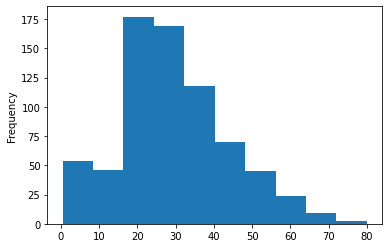

In [88]:
df_titanic['Age'].plot(kind='hist') #Menggambarkan histogram persebaran umur pada penumpang kapal

In [89]:
rata_umur_penumpang = df_titanic['Age'].mean()    #Menghitung rata-rata umur pada penumpang Kapal Titanic
rata_umur_penumpang

29.69911764705882

In [90]:
df_titanic['Age'] = df_titanic['Age'].fillna(rata_umur_penumpang) #memasukan nilai rataan kedalam missing value pada kolom age

In [91]:
df_titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
853,854,1,1,"Lines, Miss. Mary Conover",female,16.000000,0,1,PC 17592,39.4000,D28,S
851,852,0,3,"Svensson, Mr. Johan",male,74.000000,0,0,347060,7.7750,NaN,S
410,411,0,3,"Sdycoff, Mr. Todor",male,29.699118,0,0,349222,7.8958,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.420000,0,1,2625,8.5167,NaN,C
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.000000,1,0,36947,78.2667,D20,C
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.000000,1,2,SC/Paris 2123,41.5792,NaN,C
696,697,0,3,"Kelly, Mr. James",male,44.000000,0,0,363592,8.0500,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,29.699118,8,2,CA. 2343,69.5500,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,29.699118,1,0,19996,52.0000,C126,S


In [92]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### menghandle missing values pada "Embarked"

In [93]:
df_titanic[df_titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [94]:
df_titanic = df_titanic[~df_titanic['Embarked'].isna()] #menghapus kolom embarked yang null

In [95]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [96]:
df_titanic['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
302    1
303    1
304    1
305    1
891    1
Name: PassengerId, Length: 889, dtype: int64

Tidak ada data yang duplikat

## How to overcome with outlier

### Outlier Numerik

In [97]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
df_titanic.sort_values('Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.000000,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.000000,0,1,PC 17755,512.3292,B51 B53 B55,C


In [99]:
df_titanic.groupby('Pclass').agg({'Fare':'mean'})

,Fare
Pclass,
1,84.193516
2,20.662183
3,13.675550


In [100]:
bool_filter = df_titanic['Fare']>0
df_titanic[bool_filter].groupby('Pclass').agg({'Fare':'mean'})

,Fare
Pclass,
1,86.207715
2,21.358661
3,13.787875


In [101]:
df_titanic.loc[(df_titanic['Pclass']==1) & (df_titanic['Fare']==0) , 'Fare'] = 86.207715
df_titanic.loc[(df_titanic['Pclass']==2) & (df_titanic['Fare']==0) , 'Fare'] = 21.358661
df_titanic.loc[(df_titanic['Pclass']==3) & (df_titanic['Fare']==0) , 'Fare'] = 13.787875

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [102]:
df_titanic.sort_values('Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


### Outlier Kategorikal

In [103]:
list_kolom_kategorikal = df_titanic.select_dtypes('object').columns
for col in list_kolom_kategorikal :
  print(df_titanic[col].value_counts())
  print('='*30)

Braund, Mr. Owen Harris              1
Boulos, Mr. Hanna                    1
Frolicher-Stehli, Mr. Maxmillian     1
Gilinski, Mr. Eliezer                1
Murdlin, Mr. Joseph                  1
                                    ..
McCoy, Mr. Bernard                   1
Johnson, Mr. William Cahoone Jr      1
Keane, Miss. Nora A                  1
Williams, Mr. Howard Hugh "Harry"    1
Dooley, Mr. Patrick                  1
Name: Name, Length: 889, dtype: int64
male      577
female    312
Name: Sex, dtype: int64
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 146, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


## String Processing

<li> Mengekstrak informasi tertentu dari suatu string
<li> memperbaiki data yang tidak konsisten

In [104]:
df_titanic['title']  = df_titanic['Name'].str.split(', ').str[1].str.split('.').str[0]
df_titanic['title'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64

In [105]:
df_titanic['title'].isin(['Mr', 'Miss', 'Mrs']).map({True:'normal', False:'unique'})

0      normal
1      normal
2      normal
3      normal
4      normal
        ...  
886    unique
887    normal
888    normal
889    normal
890    normal
Name: title, Length: 889, dtype: object

In [106]:
df_titanic['title_category'] = df_titanic['title'].isin(['Mr', 'Miss', 'Mrs']).map({True:'normal', False:'unique'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,title_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,normal
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,normal
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,normal
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,normal
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Rev,unique
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss,normal
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,Miss,normal
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr,normal


## Machine Learning KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
model = KNeighborsClassifier()

In [110]:
X = df_titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df_titanic['Survived']

In [111]:
model.fit(X, y)

KNeighborsClassifier()

In [112]:
prediksi = model.predict(X)

In [113]:
(prediksi == y).mean()

0.7829021372328459

Pada model ini, akurasi yang didapatkan sebesar 78%.

# How to increase accuration?

Pada model diatas, hanya menghitung variabel yang bersifat numerik, dan belum menggunakan variabel yang bersifat kategorikal. Maka dari itu, kita harus mengubah data kategorikal tersebut ke numerikal. Atau disebut dengan encoding

# Categorical Data Encoding

## Binary One Hot Encoding
Binary one hot encoding, dilakukan apabila kita akan merubah data kategorikal yang hanya mempunyai 2 nilai.

In [ ]:
df_titanic['Sex'] = df_titanic['Sex'].map({
    'male':1,
    'female':0
})

In [133]:
df_titanic['title_category'] = df_titanic['title_category'].map({
    'normal':0,
    'unique':1
})

In [134]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,title_category,C,Q,S,cabin_category
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,0,1,unknown_cabin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,0,1,0,0,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,0,0,1,unknown_cabin
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,Mrs,0,0,0,1,C
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,Mr,0,0,0,1,unknown_cabin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S,Rev,1,0,0,1,unknown_cabin
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,Miss,0,0,0,1,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S,Miss,0,0,0,1,unknown_cabin
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,Mr,0,1,0,0,C


One Hot Encoding dilakukan apabila ada variabel atau fitur yang memiliki lebih dari 2 nilai dan tidak ada hirarki nya.

In [122]:
embarked_one_hot = pd.get_dummies(df_titanic['Embarked'])
df_titanic = pd.concat([df_titanic, embarked_one_hot], axis=1)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,title_category,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,normal,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,normal,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,normal,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,Mrs,normal,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,Mr,normal,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S,Rev,unique,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,Miss,normal,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S,Miss,normal,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,Mr,normal,1,0,0


# Mean Encoding
Mean encoding merupakan metode merubah kategorikal menjadi numerikal untuk variable yang memiliki banyak kategori non hirarki.

Akan tetapi, teknik mean encoding harus digunakan dengan teknik validasi yang tepat seperti train test split atau cross validation

In [130]:
df_titanic['cabin_category'] = df_titanic['Cabin'].str[0].fillna('unknown_cabin')
df_titanic.groupby('cabin_category').agg({'Survived':'mean'})

,Survived
cabin_category,
A,0.466667
B,0.733333
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000
unknown_cabin,0.299854


Pada data diatas, cabin D memiliki tingkat persentase keselamatan yang cukup besar yaitu **75.7%**

Dengan demikian, ketika kita sudah merubah beberapa variable kategorikal menjadi numerikal, itu tandanya kita bisa menerapkan prediktor kita untuk meningkatkan hasil atau akurasi pada model kita.

In [136]:
df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,title_category,C,Q,S,cabin_category
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,0,1,unknown_cabin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,1,0,0,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,0,0,1,unknown_cabin
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,0,1,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,0,1,unknown_cabin


In [138]:
X = df_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'title_category', 'C', 'Q', 'S']]
y = df_titanic['Survived']

model = KNeighborsClassifier()

model.fit(X,y)

prediksi = model.predict(X)

(prediksi==y).mean()

0.8020247469066367

Dengan melakukan teknik encoding, kita dapat meningkatkan hasil akurasi dari model yang kita latih. Terbukti, sebelumnya kita hanya mengasilkan 78% dan sekarang naik menjadi 80%

# Numerical Data Scaling

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
X = df_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'title_category', 'C', 'Q', 'S']]
y = df_titanic['Survived']


In [142]:
scaler = StandardScaler()

In [143]:
scaler.fit(X)
X_scaled = scaler.transform(X)

In [147]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [150]:
model = KNeighborsClassifier()

model.fit(X_scaled, y)

prediksi = model.predict(X_scaled)

(prediksi == y).mean()

0.8582677165354331

85% adalah hasil dari finishing model yang telah saya buat. Data Scaling cukup membantu meningkatkan hasil akurasi.

# Save CLeaned Data

In [153]:
df_titanic = df_titanic.drop('Cabin', axis=1)

In [158]:
df_titanic.to_csv('titanic_data_cleaned.csv', index=False)

In [160]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'title_category', 'C',
       'Q', 'S'],
      dtype='object')

In [162]:
df_save = pd.DataFrame(X_scaled, columns = X.columns)
df_save['Survived'] = y

In [164]:
df_save.to_csv('data_X_scaled_y.csv', index=False)